<a href="https://colab.research.google.com/github/riyash0109/MachineLearning/blob/KNN-classifier/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#importing libraries

In [ ]:
df = pd.read_csv("/content/indian_airquality2.csv")
#importing dataset

NameError: ignored

In [ ]:
df.head()
#printing the head of the dataset

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00,69.0,109.0,86.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00,82.0,138.0,105.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00,10.0,42.0,19.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00,4.0,5.0,4.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00,16.0,42.0,27.0


In [ ]:
df["pollutant_avg"].mean()
#finding mean of the pollutant_avg column

54.10069044879172

In [ ]:
def categorise(row):  
    if row['pollutant_avg'] > 54:
        return 1
    else :
        return 0

df['lable'] = df.apply(lambda row: categorise(row), axis=1)
#making a new column names as lable which will be my class lable

In [ ]:
df.head()

,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg,lable
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00,69.0,109.0,86.0,1
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00,82.0,138.0,105.0,1
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00,10.0,42.0,19.0,0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00,4.0,5.0,4.0,0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00,16.0,42.0,27.0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
#importing sklearn library

In [ ]:
scaler = StandardScaler()
#calling the function standardscaler

In [ ]:
df2 = df.drop(['id', 'country' , 'state' , 'pollutant_id' , 'last_update' , 'city' , 'station'], axis=1)
#dropping the column which won't be used

In [ ]:
df2 = df2.dropna()
#dropping the null values

In [ ]:
df2.head()
#printing the head 

,pollutant_min,pollutant_max,pollutant_avg,lable
0,69.0,109.0,86.0,1
1,82.0,138.0,105.0,1
2,10.0,42.0,19.0,0
3,4.0,5.0,4.0,0
4,16.0,42.0,27.0,0


In [ ]:
scaler.fit(df2.drop('lable', axis = 1))
#standardizing my class lable

StandardScaler()

In [ ]:
scaled_features = scaler.transform(df2.drop('lable', axis = 1))
#saving the transformed in scaled_features
scaled_features

array([[ 1.18002661,  0.11578353,  0.52460225],
       [ 1.55800048,  0.39267295,  0.83706804],
       [-0.53539328, -0.52392652, -0.57725078],
       ...,
       [-0.65169294, -0.65759727, -0.72526089],
       [ 0.16240464, -0.04653096, -0.21544829],
       [-0.53539328,  0.18261891, -0.18255716]])

In [ ]:
df3 = pd.DataFrame(scaled_features,columns=df2.columns[:-1])
df3.head()

,pollutant_min,pollutant_max,pollutant_avg
0,1.180027,0.115784,0.524602
1,1.558000,0.392673,0.837068
2,-0.535393,-0.523927,-0.577251
3,-0.709843,-0.877199,-0.823934
4,-0.360944,-0.523927,-0.445686


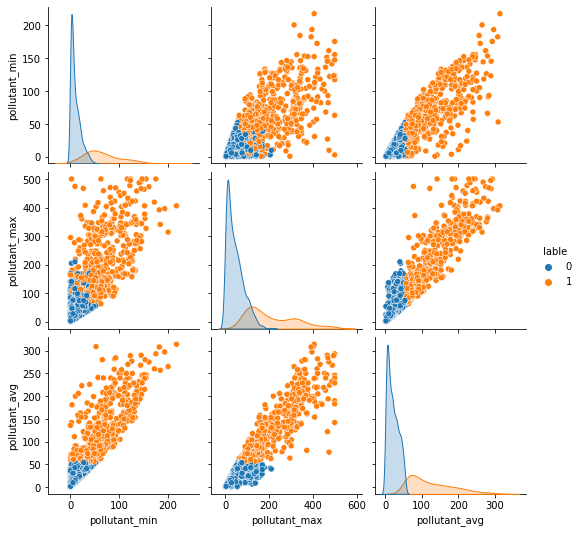

In [ ]:
import seaborn as sns
sns.pairplot(df2 , hue='lable')
#plotting my class lable

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(scaled_features,df2['lable'],test_size=0.30)
#dividing my dataset into testing data and training data into 1:3 ratio

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(x_train,y_train)
#applying knn with taking k value as 23
pred = knn.predict(x_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[356   2]
 [  2 162]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       358
           1       0.99      0.99      0.99       164

    accuracy                           0.99       522
   macro avg       0.99      0.99      0.99       522
weighted avg       0.99      0.99      0.99       522



In [ ]:
#try2 minkowski distance

In [ ]:
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(scaled_features,df2['lable'],test_size=0.40)
#dividing my dataset into testing data and training data into 60 40

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(x_train1, y_train1)
#finding knn using k value as 10 and distance measure as Eucledian distance

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred1 = classifier.predict(x_test1)
#prediction after classification

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm1 = confusion_matrix(y_test1, y_pred1)
ac1 = accuracy_score(y_test1,y_pred1)
#finding the confusion matrix and accuracy matrix

In [ ]:
ac1
#printing the accuracy

0.9827586206896551

In [ ]:
print(classification_report(y_test1,y_pred1))
#printing classifictaion report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       480
           1       0.97      0.97      0.97       216

    accuracy                           0.98       696
   macro avg       0.98      0.98      0.98       696
weighted avg       0.98      0.98      0.98       696



In [ ]:
#try3 manhattan distance

In [ ]:
x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(scaled_features,df2['lable'],test_size=0.30)
#dividing the dataset into training dataset and testing dataset with 70 30

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1)
classifier.fit(x_train2, y_train2)
#finding knn using k value as 10 and distance measure as Manhattan distance

KNeighborsClassifier(p=1)

In [ ]:
y_pred2 = classifier.predict(x_test2)
#prediction after classification

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm2 = confusion_matrix(y_test2, y_pred2)
ac2 = accuracy_score(y_test2,y_pred2)
#finding the confusion matrix and accuracy matrix

In [ ]:
cm2
#printing the confusion matrix

array([[346,   2],
       [  1, 173]])

In [ ]:
print(classification_report(y_test2,y_pred2))
#printing classifictaion report

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       348
           1       0.99      0.99      0.99       174

    accuracy                           0.99       522
   macro avg       0.99      0.99      0.99       522
weighted avg       0.99      0.99      0.99       522



In [ ]:
ac2
##printing the accuracy

0.9942528735632183

In [ ]:
#try4

Maximum accuracy:- 0.9904214559386973 at K = 0


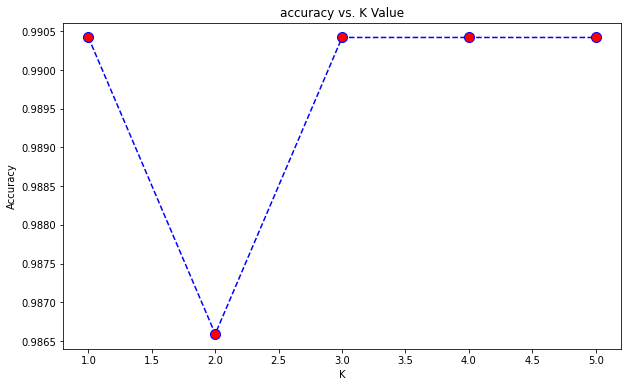

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,6):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,6),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
#running a for loop from 1 to 6 on minkowski distance measure

In [ ]:
#eucledian distance

In [ ]:
x_train3 , x_test3 , y_train3 , y_test3 = train_test_split(scaled_features,df2['lable'],test_size=0.30)
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(scaled_features,df2['lable'],test_size=0.40)
#dividing my dataset into testing data and training data into 60 40

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 4)
classifier.fit(x_train3, y_train3)


KNeighborsClassifier(p=4)

In [ ]:
y_pred3 = classifier.predict(x_test3)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm3 = confusion_matrix(y_test3, y_pred3)
ac3 = accuracy_score(y_test3,y_pred3)

In [ ]:
ac3

0.9808429118773946